In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
#loading data
all_data = pd.read_csv("data.csv")
train = all_data.iloc[:500000, :]
test = all_data.iloc[500000:, :]

In [3]:
train.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 500000 rows and 8 columns
----------------------------
The test data has 352122 rows and 8 columns


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
Price      500000 non-null int64
Year       500000 non-null int64
Mileage    500000 non-null int64
City       500000 non-null object
State      500000 non-null object
Vin        500000 non-null object
Make       500000 non-null object
Model      500000 non-null object
dtypes: int64(3), object(5)
memory usage: 30.5+ MB


In [6]:
#check missing values
train.columns[train.isnull().any()]

Index([], dtype='object')

In [7]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

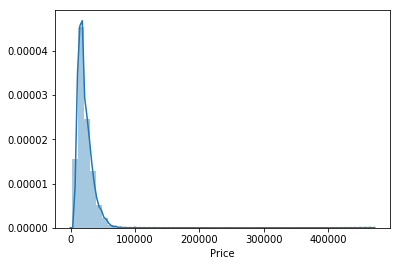

In [8]:
#SalePrice
sns.distplot(train['Price'])

In [9]:
#skewness
print("The skewness of SalePrice is {}".format(train['Price'].skew()))

The skewness of SalePrice is 5.030944808887083


Skewness is -0.313411576786557


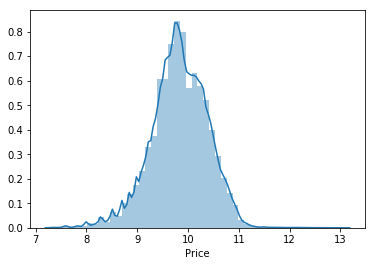

In [10]:
#now transforming the target variable
target = np.log(train['Price'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [11]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 3 numeric and 5 categorical columns in train data


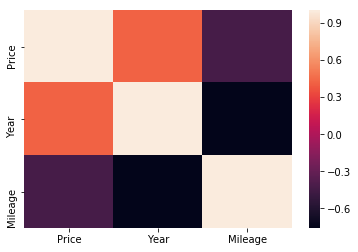

In [12]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [13]:
print (corr['Price'].sort_values(ascending=False), '\n')

Price      1.000000
Year       0.418964
Mileage   -0.429184
Name: Price, dtype: float64 



In [14]:
train['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997])

In [15]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='Year', values='Price', aggfunc=np.median).sort_values(by='Price')
pivot

,Price
Year,
1998,4500.0
1997,4622.5
2000,4995.0
1999,5000.0
2001,5495.0
2002,5990.0
2003,6069.0
2004,7446.0
2005,7995.0


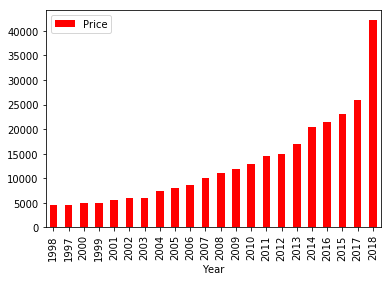

In [16]:
pivot.plot(kind='bar', color='red')

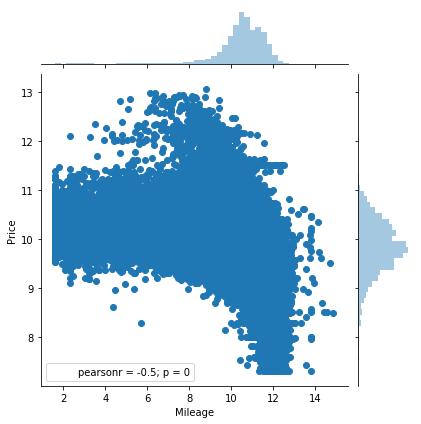

In [17]:
#GrLivArea variable
sns.jointplot(x=np.log(train['Mileage']), y=np.log(train['Price']))

In [18]:
cat_data.describe()

,City,State,Vin,Make,Model
count,500000,500000,500000,500000,500000
unique,2541,59,499953,27,1390
top,Houston,TX,3FA6P0LU4HR258592,Ford,Silverado
freq,6966,54878,2,110432,24932


In [19]:
sp_pivot = train.pivot_table(index='Make', values='Price', aggfunc=np.median).sort_values(by='Price')
sp_pivot

,Price
Make,
Isuzu,3995
Geo,5497
FIAT,11225
Hyundai,13695
Chrysler,14990
Honda,16000
HUMMER,16850
Jeep,16949
Dodge,17497


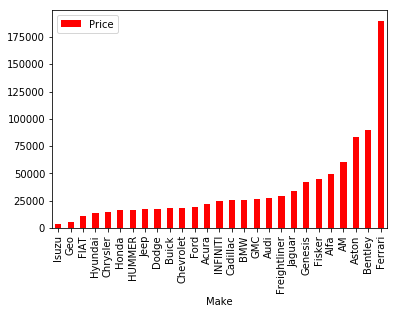

In [20]:
sp_pivot.plot(kind='bar',color='red')

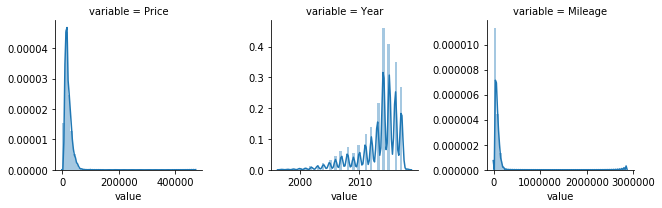

In [21]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='Price', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','Price')
g

KeyboardInterrupt: 

In [73]:
#create a label set
label_df = pd.DataFrame(index = train.index, columns = ['Price'])
label_df['Price'] = np.log(train['Price'])
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (500000, 8)
Test set size: (352122, 8)


In [37]:
train_new = train
test_new = test
print ('Train', train_new.shape)
print ('----------------')
print ('Test', test_new.shape)

Train (500000, 8)
----------------
Test (352122, 8)


In [40]:
#get numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['Price']